# Function Generation for the Training of λ-Nets

## Specitication of Experiment Settings

In [1]:
#######################################################################################################################################
###################################################### CONFIG FILE ####################################################################
#######################################################################################################################################
sleep_time = 0 #minutes


config = {
    'function_family': {
        'maximum_depth': 5,
        'beta': 1,
        'decision_sparsity': 1,
        'fully_grown': True,
        'dt_type': 'vanilla', #'vanilla', 'SDT'
    },
    'data': {
        'number_of_variables': 15, 
        'num_classes': 2,
        'categorical_indices': [0,1,2,9],
        
        'function_generation_type': 'random_decision_tree_trained', # 'make_classification', 'make_classification_trained', 'random_decision_tree', 'random_decision_tree_trained'
        'objective': 'classification', # 'regression'
        
        'x_max': 1,
        'x_min': 0,
        'x_distrib': 'uniform', #'normal', 'uniform',       
                
        'lambda_dataset_size': 5000, #number of samples per function
        'number_of_generated_datasets': 10000,
    }, 
    'computation':{
        'n_jobs': -3,
        'use_gpu': False,
        'gpu_numbers': '0',
        'RANDOM_SEED': 42,   
    }
}


In [2]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['computation'])

## Imports

In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from itertools import product       # forms cartesian products
from more_itertools import random_product 
from tqdm import tqdm_notebook as tqdm
import pickle

import numpy as np

import pandas as pd
from joblib import Parallel, delayed

import random 
from random import sample 

import os
import sys

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

from sympy import Symbol, sympify

        
import seaborn as sns
        
import random 

import warnings

from time import perf_counter



from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utilities.DecisionTree_BASIC import SDT
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from IPython.display import Image

import numpy as np
import torch
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

In [4]:
#######################################################################################################################################
###################################################### SET VARIABLES + DESIGN #########################################################
#######################################################################################################################################
os.environ['CUDA_VISIBLE_DEVICES'] = ''

sns.set_style("darkgrid")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
    
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [5]:
from utilities.utility_functions import *
#######################################################################################################################################
####################################################### CONFIG ADJUSTMENTS ############################################################
#######################################################################################################################################

#######################################################################################################################################
################################################## UPDATE VARIABLES ###################################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['computation'])

#initialize_utility_functions_config_from_curent_notebook(config)

#######################################################################################################################################
###################################################### PATH + FOLDER CREATION #########################################################
#######################################################################################################################################
globals().update(generate_paths(config, path_type='data_creation'))
generate_directory_structure()

#######################################################################################################################################
############################################################ SLEEP TIMER ##############################################################
#######################################################################################################################################
sleep_minutes(sleep_time)

In [6]:
print(path_identifier_function_data)

lNetSize5000_numDatasets10000_var15_class2_random_decision_tree_trained_xMax1_xMin0_xDistuniform_cat0-1-2-9_depth5_beta1_decisionSpars1_vanilla_fullyGrown


# Function Generation

In [7]:
if function_generation_type == 'random_decision_tree':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_random_decision_tree)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))
elif function_generation_type == 'random_decision_tree_trained':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_random_decision_tree_trained)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))  
elif function_generation_type == 'make_classification':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_make_classification)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets)) 
elif function_generation_type == 'make_classification_trained':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_make_classification_decision_tree_trained)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))    

function_identifier_list = generate_decision_tree_identifier(config)  
identifier_series_list = [pd.Series(result[0],  index=function_identifier_list) for result in result_list]

function_df = pd.DataFrame(data=np.array([result[0] for result in result_list]), columns=function_identifier_list)

X_data_list = [[identifier_series, pd.DataFrame(result[1], columns=['x' + str(i) for i in range(number_of_variables)])] for identifier_series, result in zip(identifier_series_list, result_list)]
y_data_list = [[identifier_series, pd.DataFrame(result[2], columns=['result'])] for identifier_series, result in zip(identifier_series_list, result_list)]
y_data_raw_list = [[identifier_series, pd.DataFrame(result[3], columns=['result_raw'])] for identifier_series, result in zip(identifier_series_list, result_list)]


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 38 concurrent workers.
[Parallel(n_jobs=-3)]: Done  52 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-3)]: Done 212 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-3)]: Done 454 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-3)]: Done 1030 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-3)]: Done 1734 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-3)]: Done 2566 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-3)]: Done 3526 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-3)]: Done 4614 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-3)]: Done 5830 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-3)]: Done 7174 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-3)]: Done 8646 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-3)]: Done 10000 out of 10000 | elapsed:   38.0s finished


In [8]:
function_df.head()

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,split10,split11,split12,split13,split14,split15,split16,split17,split18,split19,split20,split21,split22,split23,split24,split25,split26,split27,split28,split29,split30,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,lp8,lp9,lp10,lp11,lp12,lp13,lp14,lp15,lp16,lp17,lp18,lp19,lp20,lp21,lp22,lp23,lp24,lp25,lp26,lp27,lp28,lp29,lp30,lp31
0,0.031,0.962,0.938,0.322,-1.000,0.728,0.979,0.103,0.084,-1.000,-1.000,0.380,0.951,0.642,0.938,0.034,0.767,0.874,0.295,-1.000,-1.000,-1.000,-1.000,0.001,0.259,0.500,0.762,0.961,0.233,-1.000,-1.000,8.000,11.000,10.000,14.000,-1.000,6.000,14.000,5.000,6.000,-1.000,-1.000,3.000,4.000,14.000,6.000,14.000,7.000,5.000,7.000,-1.000,-1.000,-1.000,-1.000,3.000,11.000,1.000,6.000,4.000,8.000,-1.000,-1.000,1.000,0.000,0.895,0.400,0.000,1.000,0.433,0.708,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.442,0.560,0.478,0.588,0.488,1.000,0.250,0.529,1.000,0.941,0.635,0.000,0.000,1.000,1.000
1,0.198,0.328,0.245,0.158,0.945,0.427,0.503,0.556,0.704,0.921,0.059,0.078,0.673,0.487,0.153,0.314,-1.000,0.176,0.658,0.017,0.034,0.583,0.745,-1.000,0.887,0.818,0.660,0.483,0.889,0.818,0.988,14.000,3.000,14.000,10.000,5.000,5.000,6.000,5.000,5.000,5.000,14.000,12.000,6.000,6.000,7.000,11.000,-1.000,14.000,10.000,6.000,14.000,8.000,4.000,-1.000,11.000,7.000,7.000,6.000,10.000,14.000,8.000,0.667,0.200,0.000,0.000,0.337,0.600,0.706,0.367,0.091,0.486,1.000,0.000,0.100,0.833,0.952,0.556,1.000,1.000,0.619,1.000,0.329,0.706,0.800,0.462,0.481,0.800,0.240,1.000,0.546,0.807,0.508,0.167
2,0.132,0.251,0.187,0.969,0.848,0.667,0.014,0.966,-1.000,0.100,0.201,0.027,0.491,0.490,0.500,0.140,0.906,-1.000,-1.000,0.781,0.093,0.276,0.913,-1.000,0.984,0.891,0.427,0.821,0.125,0.278,0.064,11.000,4.000,11.000,12.000,5.000,6.000,8.000,14.000,-1.000,8.000,10.000,14.000,5.000,11.000,2.000,12.000,13.000,-1.000,-1.000,10.000,10.000,6.000,14.000,-1.000,13.000,6.000,3.000,4.000,12.000,14.000,5.000,0.846,0.542,0.000,1.000,0.000,0.000,0.000,0.000,0.205,1.000,0.667,0.433,1.000,0.364,0.111,0.750,0.000,0.000,0.720,0.000,0.143,0.562,0.385,0.818,0.333,1.000,0.250,0.886,0.477,0.548,0.362,0.493
3,0.866,0.745,0.010,0.736,0.906,-1.000,0.978,0.333,0.072,0.300,0.053,-1.000,-1.000,0.085,-1.000,0.210,0.402,-1.000,0.919,0.389,0.015,0.980,0.973,-1.000,-1.000,-1.000,-1.000,0.076,0.312,-1.000,-1.000,14.000,13.000,3.000,13.000,5.000,-1.000,11.000,12.000,3.000,12.000,7.000,-1.000,-1.000,10.000,-1.000,13.000,3.000,-1.000,6.000,6.000,7.000,5.000,5.000,-1.000,-1.000,-1.000,-1.000,10.000,11.000,-1.000,-1.000,0.627,0.511,0.445,0.506,0.000,0.000,0.860,0.250,0.500,0.327,0.917,0.494,1.000,0.000,0.203,0.444,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.524,1.000,0.485,0.374,0.000,0.000,0.000,0.000
4,0.987,0.053,0.095,0.636,0.056,-1.000,0.500,0.005,0.957,0.056,0.668,-1.000,-1.000,0.998,0.243,0.585,0.868,0.662,-1.000,-1.000,-1.000,0.065,0.687,-1.000,-1.000,-1.000,-1.000,0.091,0.408,-1.000,0.389,6.000,3.000,7.000,6.000,3.000,-1.000,9.000,3.000,10.000,6.000,7.000,-1.000,-1.000,6.000,13.000,7.000,14.000,5.000,-1.000,-1.000,-1.000,14.000,12.000,-1.000,-1.000,-1.000,-1.000,14.000,7.000,-1.000,14.000,0.556,0.923,0.404,0.739,0.351,0.094,1.000,1.000,0.000,0.000,1.000,1.000,0.614,0.517,0.456,0.529,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,0.833,0.333


In [9]:
X_data_list[0][0].head(10)

feat0    0.031
feat1    0.962
feat2    0.938
feat3    0.322
feat4   -1.000
feat5    0.728
feat6    0.979
feat7    0.103
feat8    0.084
feat9   -1.000
dtype: float64

In [10]:
X_data_list[0][1].head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,0.000,1.000,1.000,0.599,0.156,0.156,0.058,0.866,0.601,1.000,0.021,0.970,0.832,0.212,0.182
1,0.000,0.000,1.000,0.432,0.291,0.612,0.139,0.292,0.366,0.000,0.785,0.200,0.514,0.592,0.046
2,1.000,0.000,0.000,0.949,0.966,0.808,0.305,0.098,0.684,0.000,0.122,0.495,0.034,0.909,0.259
3,1.000,0.000,1.000,0.547,0.185,0.970,0.775,0.939,0.895,1.000,0.922,0.088,0.196,0.045,0.325
4,0.000,0.000,1.000,0.357,0.281,0.543,0.141,0.802,0.075,1.000,0.772,0.199,0.006,0.815,0.707
5,1.000,1.000,0.000,0.358,0.116,0.863,0.623,0.331,0.064,0.000,0.325,0.730,0.638,0.887,0.472
6,0.000,1.000,1.000,0.561,0.771,0.494,0.523,0.428,0.025,0.000,0.031,0.636,0.314,0.509,0.908
7,0.000,0.000,1.000,0.229,0.077,0.290,0.161,0.930,0.808,1.000,0.871,0.804,0.187,0.893,0.539
8,1.000,1.000,0.000,0.110,0.228,0.427,0.818,0.861,0.007,1.000,0.417,0.222,0.120,0.338,0.943
9,0.000,1.000,1.000,0.364,0.972,0.962,0.252,0.497,0.301,0.000,0.037,0.610,0.503,0.051,0.279


In [11]:
y_data_list[0][0].head(10)

feat0    0.031
feat1    0.962
feat2    0.938
feat3    0.322
feat4   -1.000
feat5    0.728
feat6    0.979
feat7    0.103
feat8    0.084
feat9   -1.000
dtype: float64

In [12]:
y_data_list[1][1].head(10)

,result
0,0
1,0
2,0
3,1
4,1
5,0
6,0
7,1
8,0
9,1


In [13]:
y_data_list[2][1].head(10)

,result
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,1


In [14]:
y_data_raw_list[2][1].head(10)

,result_raw
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,1


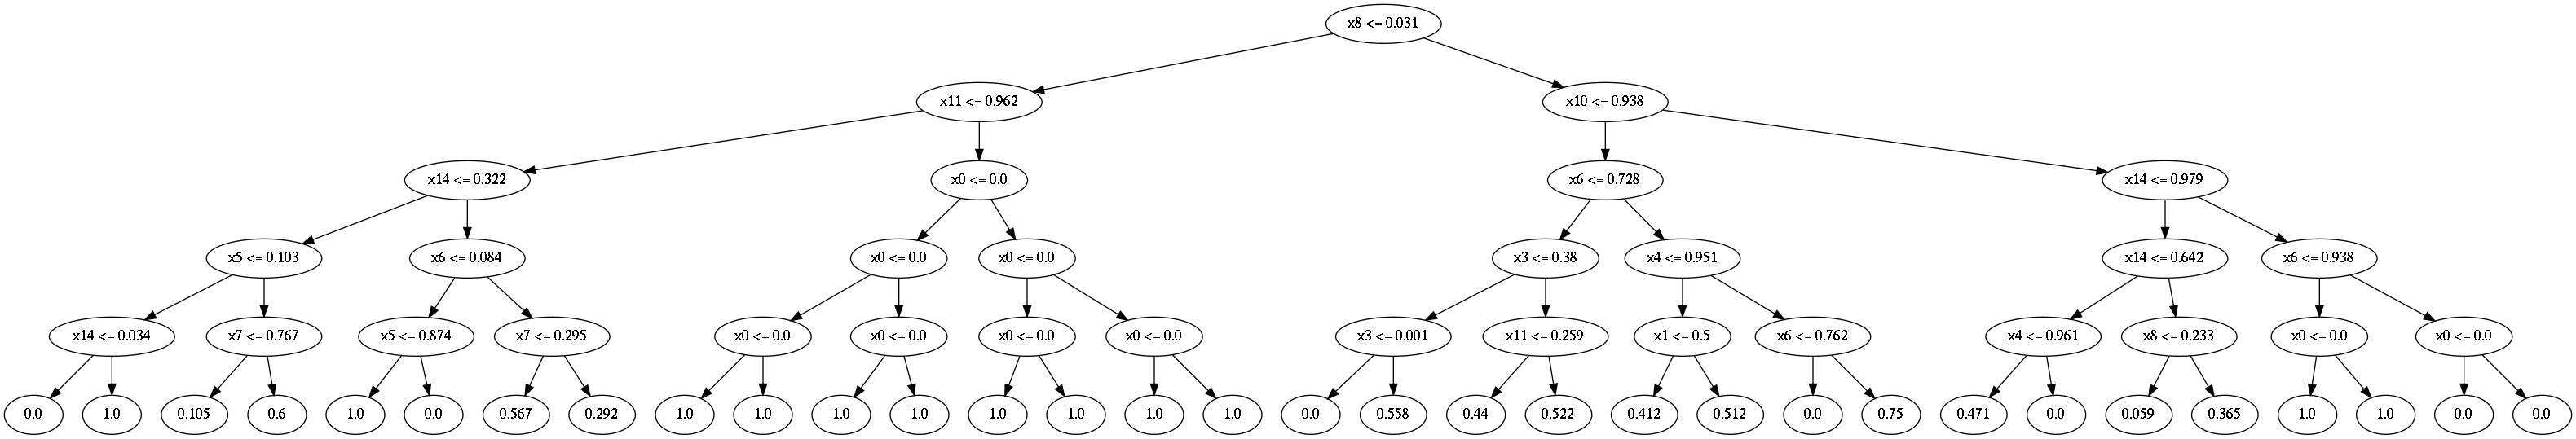

In [15]:
plot_tree_from_parameters(y_data_list[0][0].values, config)

In [16]:
path_functions = './data/saved_function_lists/functions_' + path_identifier_function_data + '.csv'
function_df.to_csv(path_functions, index=False)

path_X_data = './data/saved_function_lists/X_data_' + path_identifier_function_data + '.pkl'
with open(path_X_data, 'wb') as f:
    pickle.dump(X_data_list, f)
    
path_y_data = './data/saved_function_lists/y_data_' + path_identifier_function_data + '.pkl'
with open(path_y_data, 'wb') as f:
    pickle.dump(y_data_list, f)
